In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [56]:
steps_data = pd.read_csv("01_Steps.csv")
steps_data

,date,steps,distance,runDistance,calories
0,2016-04-27,4948,3242,46,281
1,2016-04-28,16573,12060,79,751
2,2016-04-29,18002,12916,29,737
3,2016-04-30,4126,2981,11,207
4,2016-05-01,3869,2651,0,244
...,...,...,...,...,...
2265,2022-07-10,3518,2339,1948,268
2266,2022-07-11,3042,1982,1689,128
2267,2022-07-12,5982,4385,3491,196
2268,2022-07-13,7853,5632,4445,254


In [57]:
sleep_data = pd.read_csv("02_Sleep.csv")
sleep_data

,date,deepSleepTime,shallowSleepTime,wakeTime,start,stop
0,2016-04-27,0,0,0,1461708000,1461708000
1,2016-04-28,158,262,2,1461801240,1461826560
2,2016-04-29,234,241,0,1461883500,1461912000
3,2016-04-30,239,318,0,1461979500,1462012920
4,2016-05-01,180,333,3,1462065840,1462096800
...,...,...,...,...,...,...
2265,2022-07-10,96,248,0,1657410660,1657435560
2266,2022-07-11,80,221,0,1657499760,1657522140
2267,2022-07-12,84,219,0,1657582740,1657606380
2268,2022-07-13,88,262,0,1657667640,1657693980


#### Merging 2 dataframes (steps & sleep)

In [58]:
data = pd.merge(steps_data, sleep_data, on = "date")

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2270 entries, 0 to 2269
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              2270 non-null   object
 1   steps             2270 non-null   int64 
 2   distance          2270 non-null   int64 
 3   runDistance       2270 non-null   int64 
 4   calories          2270 non-null   int64 
 5   deepSleepTime     2270 non-null   int64 
 6   shallowSleepTime  2270 non-null   int64 
 7   wakeTime          2270 non-null   int64 
 8   start             2270 non-null   object
 9   stop              2270 non-null   object
dtypes: int64(7), object(3)
memory usage: 195.1+ KB


### Changing column names

In [61]:
data.columns

Index(['date', 'steps', 'distance', 'runDistance', 'calories', 'deepSleepTime',
       'shallowSleepTime', 'wakeTime', 'start', 'stop'],
      dtype='object')

In [62]:
data.columns = ['Date', 'Steps', 'Distance', 'Run Distance', 'Calories', 'Deep Sleep Time',
       'Shallow Sleep Time', 'Wake Time', 'Start', 'Stop']

In [63]:
data

,Date,Steps,Distance,Run Distance,Calories,Deep Sleep Time,Shallow Sleep Time,Wake Time,Start,Stop
0,2016-04-27,4948,3242,46,281,0,0,0,1461708000,1461708000
1,2016-04-28,16573,12060,79,751,158,262,2,1461801240,1461826560
2,2016-04-29,18002,12916,29,737,234,241,0,1461883500,1461912000
3,2016-04-30,4126,2981,11,207,239,318,0,1461979500,1462012920
4,2016-05-01,3869,2651,0,244,180,333,3,1462065840,1462096800
...,...,...,...,...,...,...,...,...,...,...
2265,2022-07-10,3518,2339,1948,268,96,248,0,1657410660,1657435560
2266,2022-07-11,3042,1982,1689,128,80,221,0,1657499760,1657522140
2267,2022-07-12,5982,4385,3491,196,84,219,0,1657582740,1657606380
2268,2022-07-13,7853,5632,4445,254,88,262,0,1657667640,1657693980


#### Converting date to datetime format

In [64]:
data['Date'] = pd.to_datetime(data["Date"], format="%Y/%m/%d")

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2270 entries, 0 to 2269
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2270 non-null   datetime64[ns]
 1   Steps               2270 non-null   int64         
 2   Distance            2270 non-null   int64         
 3   Run Distance        2270 non-null   int64         
 4   Calories            2270 non-null   int64         
 5   Deep Sleep Time     2270 non-null   int64         
 6   Shallow Sleep Time  2270 non-null   int64         
 7   Wake Time           2270 non-null   int64         
 8   Start               2270 non-null   object        
 9   Stop                2270 non-null   object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 195.1+ KB


### Adding total sleeping time column

In [66]:
data["Total Sleep Time"] = data["Deep Sleep Time"] + data["Shallow Sleep Time"]

In [67]:
data

,Date,Steps,Distance,Run Distance,Calories,Deep Sleep Time,Shallow Sleep Time,Wake Time,Start,Stop,Total Sleep Time
0,2016-04-27,4948,3242,46,281,0,0,0,1461708000,1461708000,0
1,2016-04-28,16573,12060,79,751,158,262,2,1461801240,1461826560,420
2,2016-04-29,18002,12916,29,737,234,241,0,1461883500,1461912000,475
3,2016-04-30,4126,2981,11,207,239,318,0,1461979500,1462012920,557
4,2016-05-01,3869,2651,0,244,180,333,3,1462065840,1462096800,513
...,...,...,...,...,...,...,...,...,...,...,...
2265,2022-07-10,3518,2339,1948,268,96,248,0,1657410660,1657435560,344
2266,2022-07-11,3042,1982,1689,128,80,221,0,1657499760,1657522140,301
2267,2022-07-12,5982,4385,3491,196,84,219,0,1657582740,1657606380,303
2268,2022-07-13,7853,5632,4445,254,88,262,0,1657667640,1657693980,350


In [68]:
cols = list(data.columns)

In [73]:
data = data[cols[0:7] +[cols[-1]] + cols[7:10]]

In [74]:
data

,Date,Steps,Distance,Run Distance,Calories,Deep Sleep Time,Shallow Sleep Time,Total Sleep Time,Total Sleep Time,Wake Time,Start,Stop
0,2016-04-27,4948,3242,46,281,0,0,0,0,0,1461708000,1461708000
1,2016-04-28,16573,12060,79,751,158,262,420,420,2,1461801240,1461826560
2,2016-04-29,18002,12916,29,737,234,241,475,475,0,1461883500,1461912000
3,2016-04-30,4126,2981,11,207,239,318,557,557,0,1461979500,1462012920
4,2016-05-01,3869,2651,0,244,180,333,513,513,3,1462065840,1462096800
...,...,...,...,...,...,...,...,...,...,...,...,...
2265,2022-07-10,3518,2339,1948,268,96,248,344,344,0,1657410660,1657435560
2266,2022-07-11,3042,1982,1689,128,80,221,301,301,0,1657499760,1657522140
2267,2022-07-12,5982,4385,3491,196,84,219,303,303,0,1657582740,1657606380
2268,2022-07-13,7853,5632,4445,254,88,262,350,350,0,1657667640,1657693980


#### Creating checkpoint

In [84]:
data1 = data.copy()

#### Drop Start & Stop

In [85]:
data1.drop(columns = ["Start", 'Stop'], inplace = True)

#### Converting Distance & Run Distance to km

In [86]:
data1["Distance"] = data1["Distance"]/1000
data1["Run Distance"] = data1["Run Distance"]/1000


#### Steps -> No:of steps
#### Distance -> Distance covered(km)
#### Run Distance -> Distance covered running (km)
#### Calories -> Calories burned
#### Deep Sleep Time -> Deep sleep in mins
#### Shallow Sleep Time -> Shallow sleep in mins
#### Wake Time -> Time I have been awake between sleeps

In [88]:
data1

,Date,Steps,Distance,Run Distance,Calories,Deep Sleep Time,Shallow Sleep Time,Total Sleep Time,Total Sleep Time,Wake Time
0,2016-04-27,4948,3.242,0.046,281,0,0,0,0,0
1,2016-04-28,16573,12.060,0.079,751,158,262,420,420,2
2,2016-04-29,18002,12.916,0.029,737,234,241,475,475,0
3,2016-04-30,4126,2.981,0.011,207,239,318,557,557,0
4,2016-05-01,3869,2.651,0.000,244,180,333,513,513,3
...,...,...,...,...,...,...,...,...,...,...
2265,2022-07-10,3518,2.339,1.948,268,96,248,344,344,0
2266,2022-07-11,3042,1.982,1.689,128,80,221,301,301,0
2267,2022-07-12,5982,4.385,3.491,196,84,219,303,303,0
2268,2022-07-13,7853,5.632,4.445,254,88,262,350,350,0


In [96]:
data1.describe()

,Steps,Distance,Run Distance,Calories,Deep Sleep Time,Shallow Sleep Time,Total Sleep Time,Total Sleep Time,Wake Time
count,2270.000000,2270.000000,2270.000000,2270.000000,2270.000000,2270.000000,2270.000000,2270.000000,2270.000000
mean,8218.443172,5.917784,0.491622,232.674449,109.228194,233.497357,342.725551,342.725551,4.363436
std,6617.307618,4.818641,0.877906,209.813013,74.414429,135.721024,194.330064,194.330064,25.255863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3174.750000,2.201250,0.144000,84.250000,57.000000,180.250000,276.250000,276.250000,0.000000
50%,7034.000000,5.043500,0.267500,186.500000,114.000000,263.000000,397.000000,397.000000,0.000000
75%,11046.750000,7.994000,0.503750,301.000000,161.000000,325.000000,471.000000,471.000000,0.000000
max,37375.000000,28.234000,17.564000,2543.000000,384.000000,601.000000,970.000000,970.000000,604.000000


### Analysis

#### Steps vs Calories

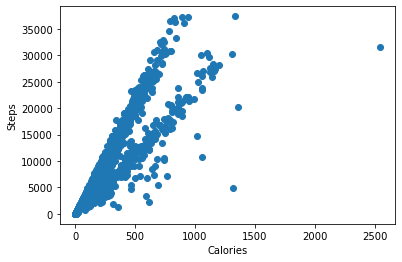

In [99]:
plt.scatter(data1["Calories"], data1["Steps"])
plt.ylabel('Steps')
plt.xlabel('Calories')
plt.show()

#### Adding new column for days

In [105]:
data1["Day"] = data1["Date"].dt.day_name()

In [106]:
data1

,Date,Steps,Distance,Run Distance,Calories,Deep Sleep Time,Shallow Sleep Time,Total Sleep Time,Total Sleep Time,Wake Time,Day
0,2016-04-27,4948,3.242,0.046,281,0,0,0,0,0,Wednesday
1,2016-04-28,16573,12.060,0.079,751,158,262,420,420,2,Thursday
2,2016-04-29,18002,12.916,0.029,737,234,241,475,475,0,Friday
3,2016-04-30,4126,2.981,0.011,207,239,318,557,557,0,Saturday
4,2016-05-01,3869,2.651,0.000,244,180,333,513,513,3,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
2265,2022-07-10,3518,2.339,1.948,268,96,248,344,344,0,Sunday
2266,2022-07-11,3042,1.982,1.689,128,80,221,301,301,0,Monday
2267,2022-07-12,5982,4.385,3.491,196,84,219,303,303,0,Tuesday
2268,2022-07-13,7853,5.632,4.445,254,88,262,350,350,0,Wednesday


#### Avg Sleep Time on different days of the week

In [194]:
days = data1["Day"].unique()
days


array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

In [195]:
shallow = data1.groupby("Day").mean()['Shallow Sleep Time']
deep = data1.groupby('Day').mean()['Deep Sleep Time']

In [197]:
shallow

Day
Friday       234.833333
Monday       212.901235
Saturday     238.259259
Sunday       248.873457
Thursday     227.083077
Tuesday      240.342593
Wednesday    232.212308
Name: Shallow Sleep Time, dtype: float64

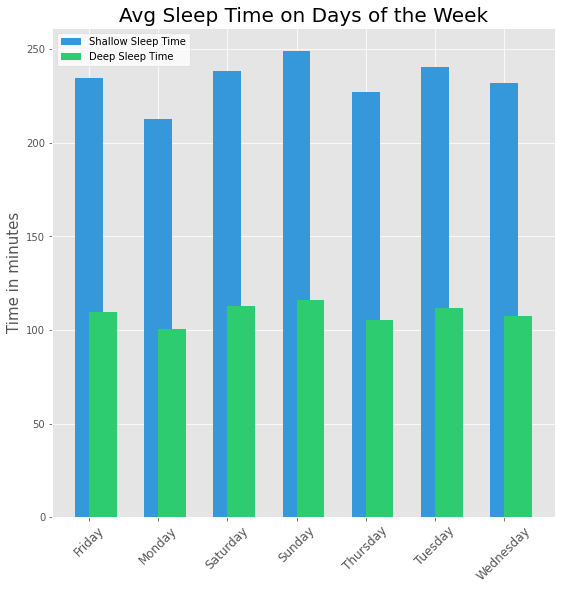

In [198]:
plt.style.use('ggplot')
plt.figure(figsize=(9,9))
plt.bar(shallow.index, shallow, width = 0.4, color="#3498db", label = "Shallow Sleep Time")
plt.bar(deep.index, deep, color="#2ecc71",width=0.4, align="edge", label = "Deep Sleep Time")
plt.xticks(days, rotation=45, size=12)
plt.legend(facecolor="white", loc = "upper left")
plt.title("Avg Sleep Time on Days of the Week", fontsize = 20)
plt.ylabel("Time in minutes", fontsize = 15)
plt.show()

#### Avg Calories burned on each day of the week

In [199]:
calo = data1.groupby("Day").mean()["Calories"]
total = sum(calo)

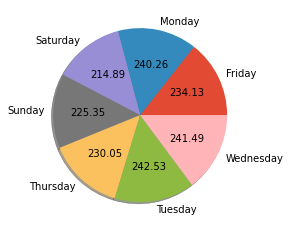

In [200]:
plt.pie(calo, labels = calo.index, autopct = lambda p:'{:.2f}'.format((p * total) / 100), shadow = True)
plt.show()

#### Avg Wake Time on each day of the week

In [227]:
data1.groupby('Day').mean()["Wake Time"]

Day
Friday       3.808642
Monday       3.694444
Saturday     4.030864
Sunday       6.780864
Thursday     3.612308
Tuesday      4.231481
Wednesday    4.387692
Name: Wake Time, dtype: float64

In [209]:
RunRatio = (data1["Run Distance"]/data1["Distance"])*100

In [210]:
RunRatio


0        1.418877
1        0.655058
2        0.224528
3        0.369004
4        0.000000
          ...    
2265    83.283454
2266    85.216953
2267    79.612315
2268    78.924006
2269    76.848359
Length: 2270, dtype: float64

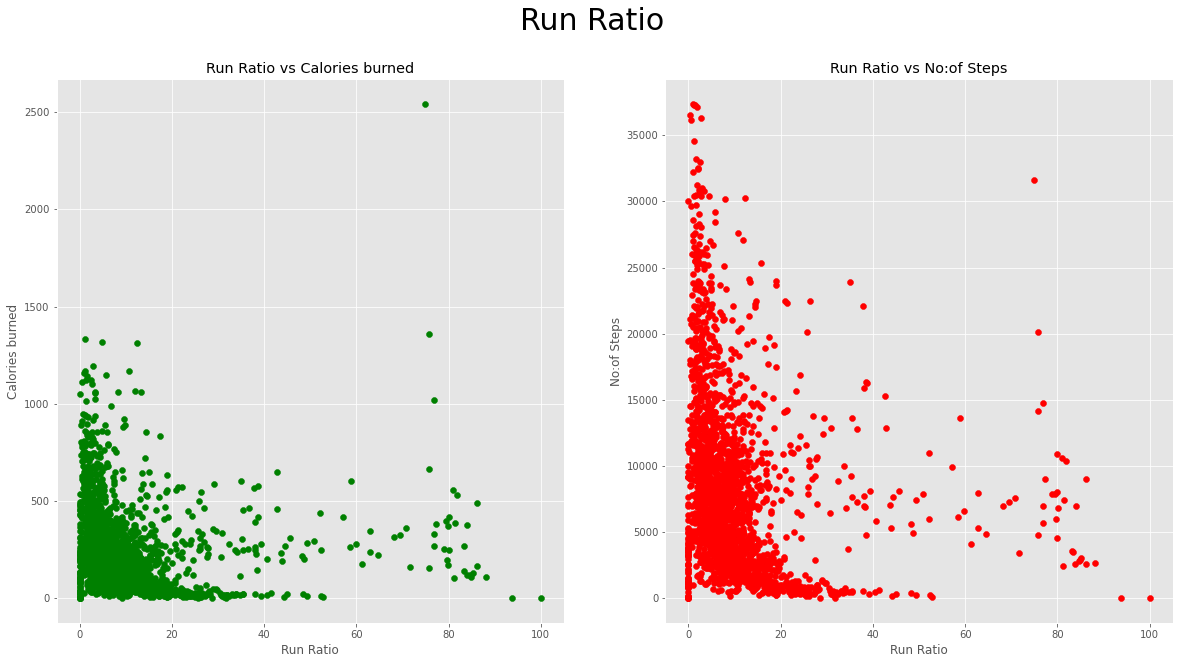

In [223]:
plt.figure(figsize=(20,10))
plt.suptitle("Run Ratio ", fontsize=30)

plt.subplot(1,2,1)
plt.title("Run Ratio vs Calories burned")
plt.scatter(RunRatio, data1["Calories"], color = "green")
plt.xlabel("Run Ratio")
plt.ylabel('Calories burned')

plt.subplot(1,2,2)
plt.scatter(RunRatio, data1["Steps"], color="red")
plt.title("Run Ratio vs No:of Steps")
plt.xlabel("Run Ratio")
plt.ylabel('No:of Steps')


plt.show()